<a href="https://colab.research.google.com/github/ahmedelsayed16112002/Projects/blob/main/Student_performance_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

nikhil7280_student_performance_multiple_linear_regression_path = kagglehub.dataset_download('nikhil7280/student-performance-multiple-linear-regression')
ahmed1611_student_performance_dataset_path = kagglehub.dataset_download('ahmed1611/student-performance-dataset')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import warnings
warnings.filterwarnings('ignore')

/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv
/kaggle/input/student-performance-dataset/Student_Performance.csv


# Reading Date

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv')
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [ ]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [ ]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [ ]:
df.duplicated().sum()

127

In [ ]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

# Data Preprocessing


# 🏆 Which Encoding Method is Better? (NumPy vs. Sklearn)

It depends on **your use case**! Below is a comparison of **NumPy (`np.where`) vs. Sklearn (`LabelEncoder`)**:

| **Method**                  | **When to Use?** | **Pros** | **Cons** |
|-----------------------------|-----------------|----------|----------|
| ✅ `np.where()` (Your Method) | Best for **binary** categories (e.g., `"Yes"/"No"`) | ✔️ Simple & direct <br> ✔️ Fully controlled <br> ✔️ No extra libraries needed | ❌ Not scalable for many categories |
| ✅ `map()` (Pandas) | Best for **binary** categories (like `np.where`) but more readable | ✔️ Clean & explicit mapping <br> ✔️ Works well for `"Yes/No"` replacements | ❌ Can break if unknown values appear |
| ✅ `LabelEncoder` (Sklearn) | Best for binary categories in **ML pipelines** | ✔️ Works in ML pipelines <br> ✔️ Handles **any** two categories (not just `"Yes/No"`) | ❌ Assigns **automatic** numbers, which can be unpredictable |
| ✅ `OneHotEncoder` (Sklearn) | Best for **multi-category** columns (e.g., `"A/B/C"`) | ✔️ Works for 2+ categories <br> ✔️ Prevents ML bias in categorical variables | ❌ Creates multiple columns <br> ❌ Requires extra processing |

---

## 🔹 When to Use Each?
### 1️⃣ If you only have `"Yes"/"No"` (Binary Data)
   - ✅ Use `np.where()` (your method) OR `map()`
   - If you are working inside an **ML pipeline**, use `LabelEncoder`.

### 2️⃣ If you have 3+ categories (e.g., `"A", "B", "C"`)
   - ✅ Use `OneHotEncoder` from Sklearn.

---

## 🚀 My Recommendation
If you're just doing quick feature engineering, **your method (`np.where()`) is great**.  
If you're building a full machine learning model with `sklearn`, use **`LabelEncoder` or `OneHotEncoder`** for better integration.



In [ ]:
df['Extracurricular Activities'] = np.where(df['Extracurricular Activities'] == 'Yes',1,0)
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


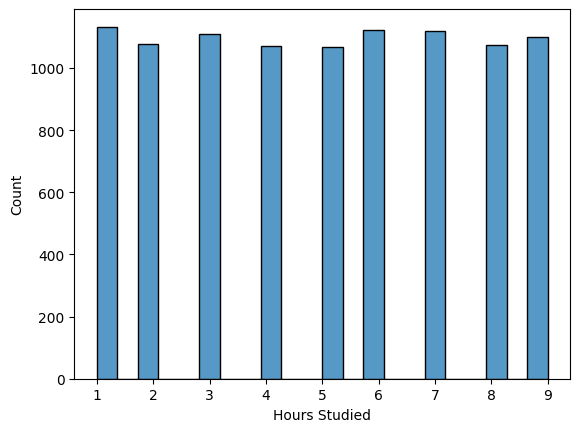

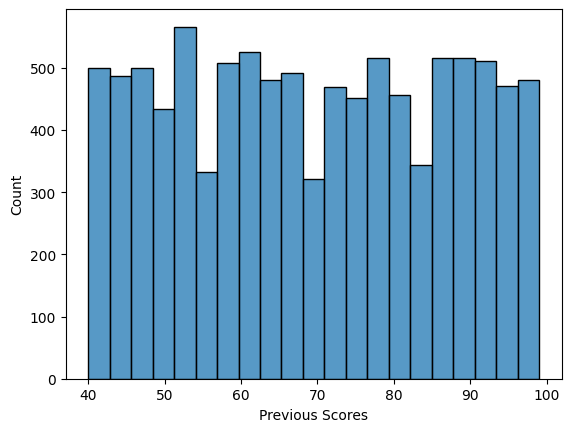

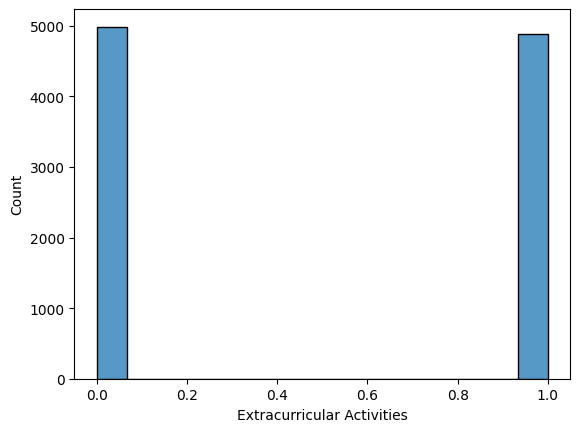

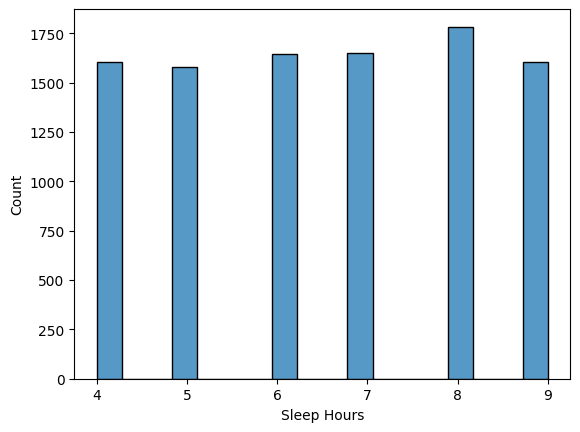

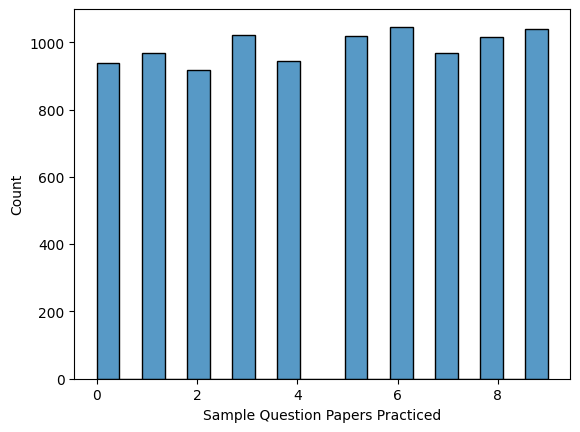

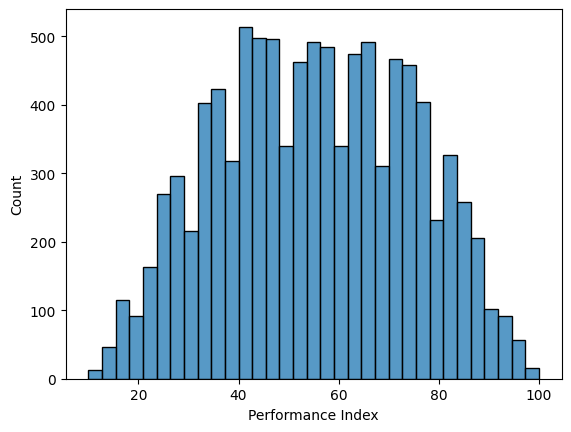

In [ ]:

for col in df.select_dtypes(include='number'):
    plt.figure()
    sns.histplot(data = df , x = col )
    plt.show()


In [ ]:
print(df.isin([np.inf, -np.inf]).sum())


Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


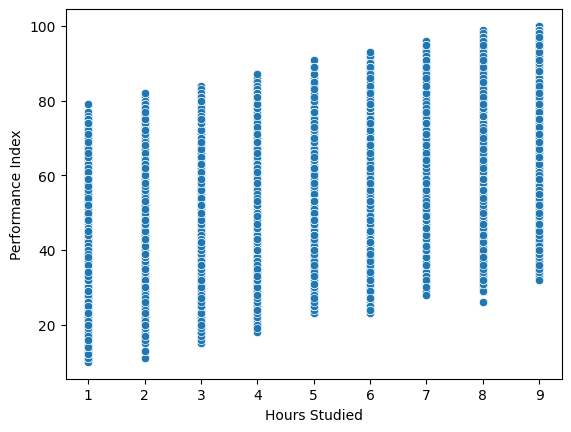

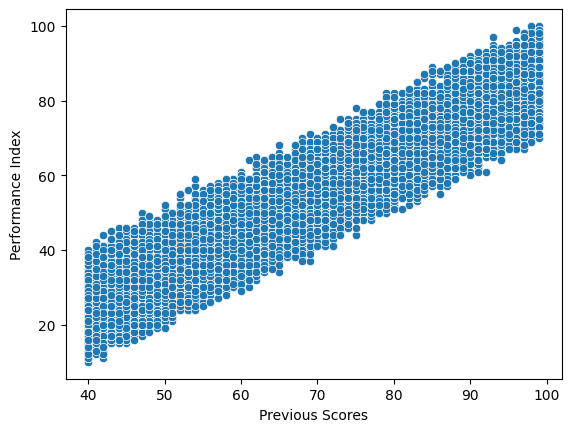

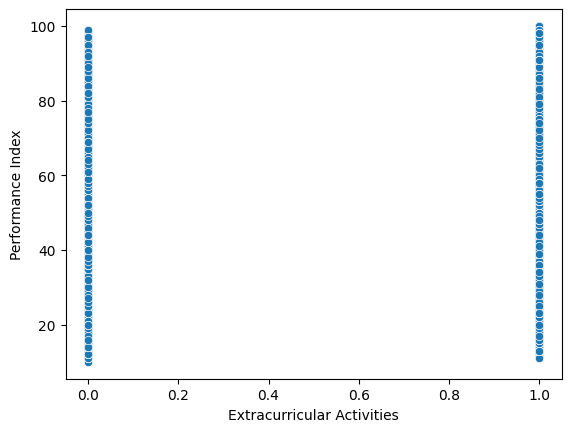

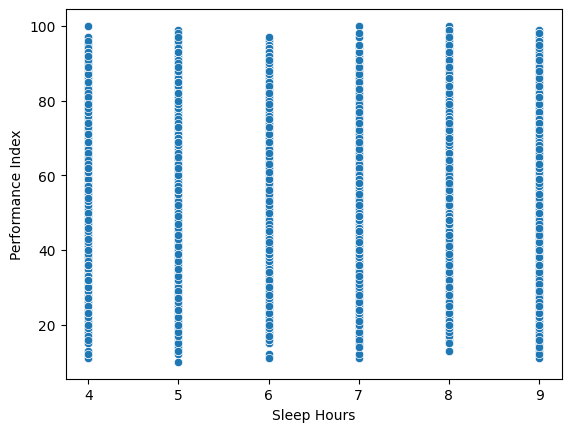

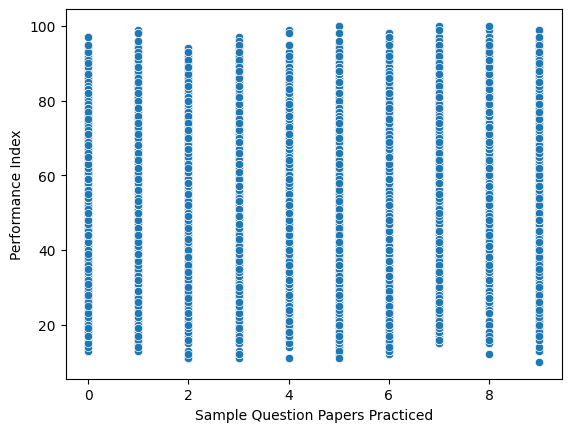

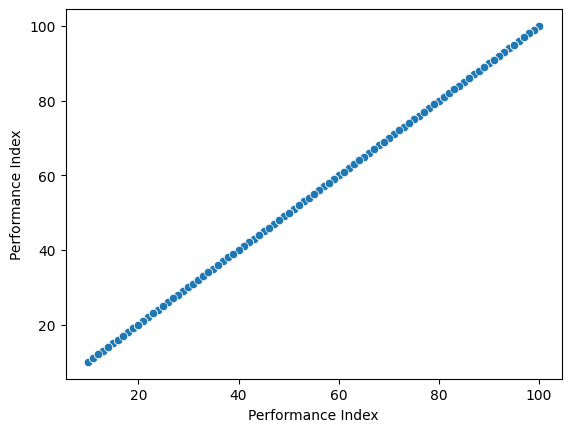

In [ ]:
# for col in df.select_dtypes(include = 'number'):
#     sns.scatterplot(df[col] , x = col , y = 'performance index')
#     plt.show()
for i in df.select_dtypes(include = 'number'):
    sns.scatterplot(data = df, x = i,y= 'Performance Index')
    plt.show()

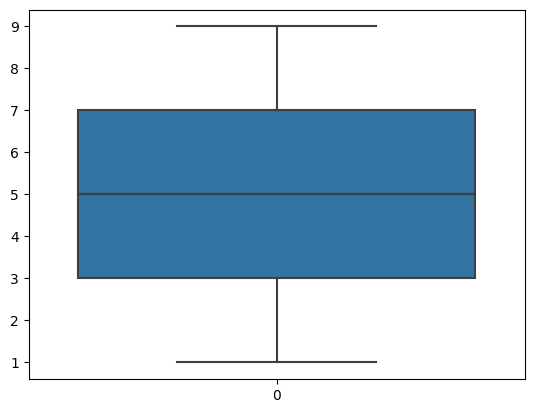

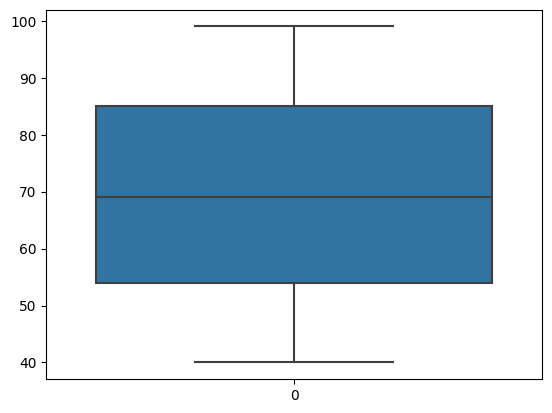

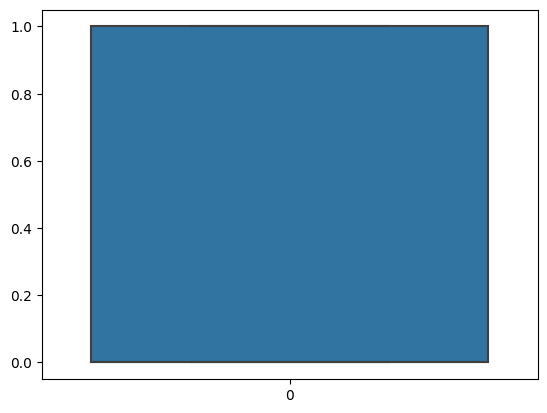

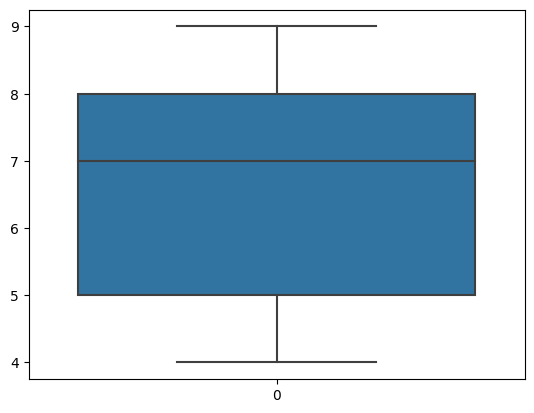

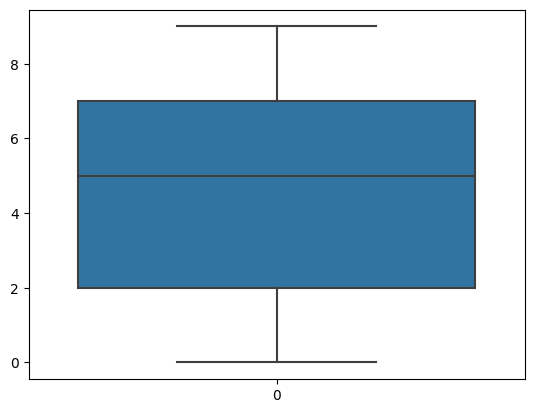

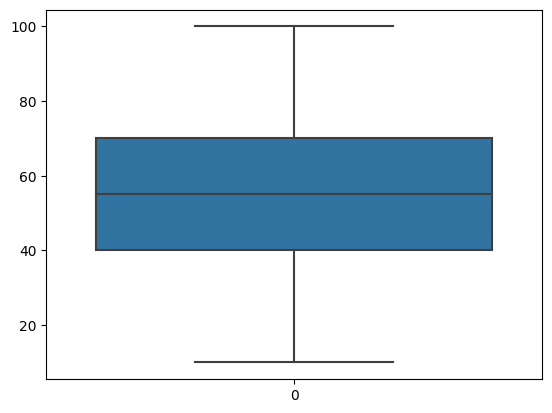

In [ ]:
for col in df.select_dtypes(include = 'number'):
    sns.boxplot(df[col])
    plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

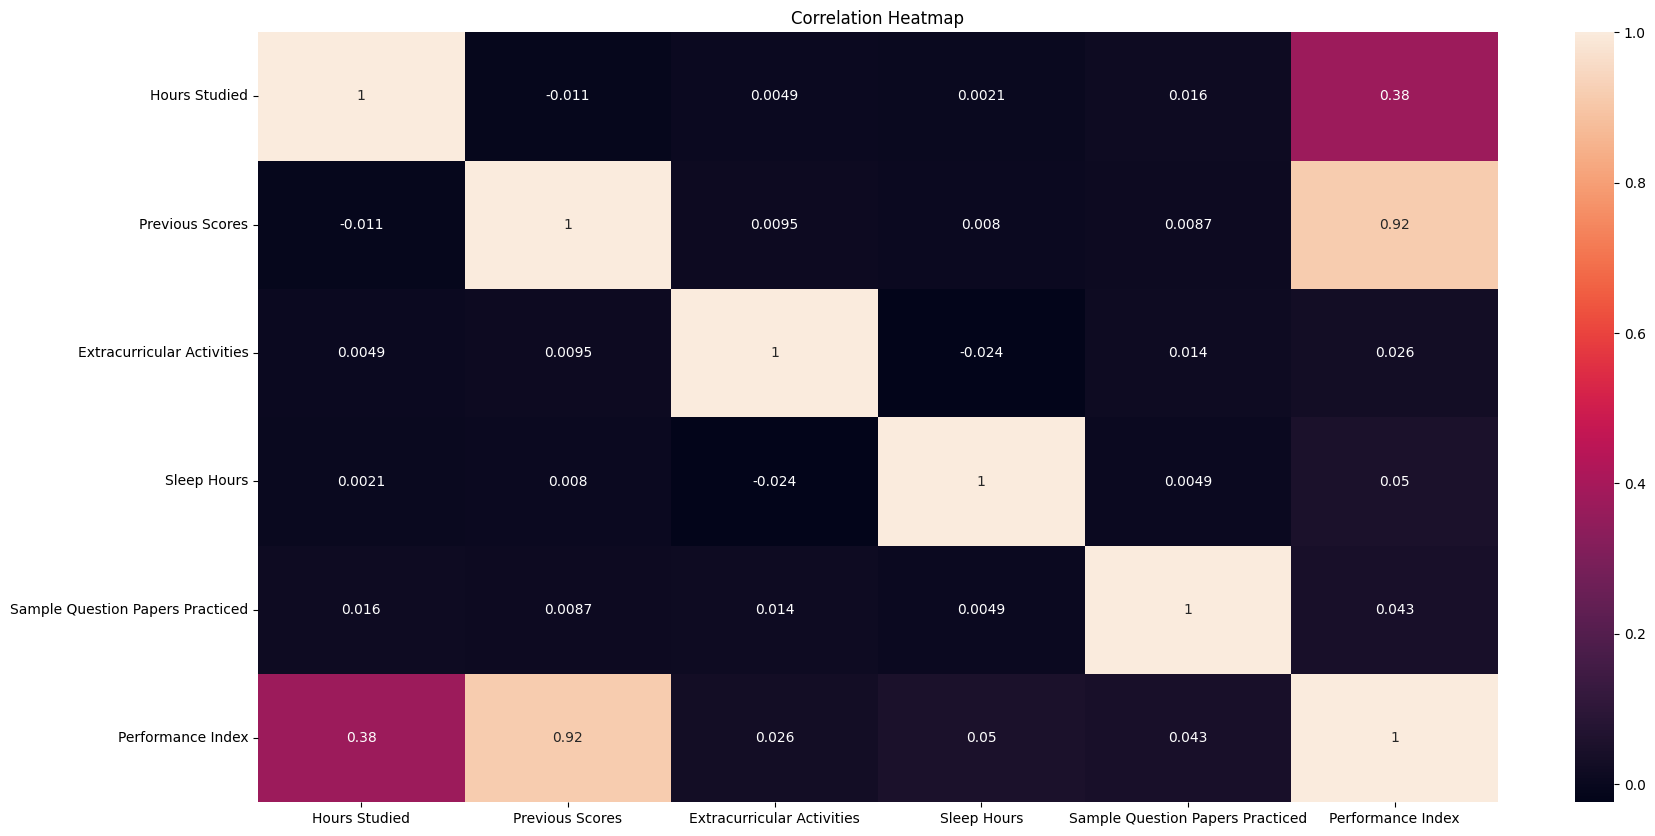

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(data = df.corr() , annot = True)
plt.title('Correlation Heatmap')



# Data splitting

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9873 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     9873 non-null   int64  
 1   Previous Scores                   9873 non-null   int64  
 2   Extracurricular Activities        9873 non-null   int64  
 3   Sleep Hours                       9873 non-null   int64  
 4   Sample Question Papers Practiced  9873 non-null   int64  
 5   Performance Index                 9873 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 798.0 KB


In [ ]:
x = df.drop('Performance Index' , axis= 1)
y = df['Performance Index']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7898, 5)
(7898,)
(1975, 5)
(1975,)


## Model Training

In [ ]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()

regr.fit(x_train,y_train)

print('Coefficients : ',regr.coef_)
print('Intercept : ',regr.intercept_)

Coefficients :  [2.8510219  1.01843034 0.57382297 0.47207329 0.18870366]
Intercept :  -33.981324496440706


In [ ]:
y_test_pred = regr.predict(x_test)

In [ ]:
# Test Evalution

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate MAE
mae = mean_absolute_error(y_test, y_test_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate MSE
mse = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate R-squared
r2 = r2_score(y_test, y_test_pred)
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 1.6469703984255573
Mean Squared Error (MSE): 4.305900938538477
Root Mean Squared Error (RMSE): 2.0750664901488043
R-squared (R²): 0.9884301209927054


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9873 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     9873 non-null   int64  
 1   Previous Scores                   9873 non-null   int64  
 2   Extracurricular Activities        9873 non-null   int64  
 3   Sleep Hours                       9873 non-null   int64  
 4   Sample Question Papers Practiced  9873 non-null   int64  
 5   Performance Index                 9873 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 798.0 KB


In [ ]:
df['Hours Studied'].value_counts()

Hours Studied
1    1133
6    1122
7    1118
3    1110
9    1099
2    1077
8    1074
4    1071
5    1069
Name: count, dtype: int64

In [ ]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
